# Clustering Project
**nateghiiman@gmail.com**

در این پروژه شما نیاز دارید مشتریان را در دسته های مختلف تقسیم کنید. ویژگی داده ای که در اختیار شماست به صورت زیر است. پیشنهاد میشود از تمامی الگوریتم های خوشه بندی را جهت بهبود الگوریتم خود امتحان کنید.

شناسه کاربر (CustomerID)

جنسیت کاربر (Gender)

سن کاربر (Age)

درآمد سالیلانه (Annual Income)

امتیاز کاربر بر اساس رفتار (Spending Score)

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder, normalize, StandardScaler
import scipy

In [3]:
df=pd.read_csv("C:/python/Jadi_ML/01 Iman/4 Customer.csv",index_col=0)
print(df.shape)
df

(200, 4)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [4]:
df["Gender"]=LabelEncoder().fit_transform(df["Gender"])
df


,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,1,19,15,39
2,1,21,15,81
3,0,20,16,6
4,0,23,16,77
5,0,31,17,40
...,...,...,...,...
196,0,35,120,79
197,0,45,126,28
198,1,32,126,74


In [5]:
col=df.columns
x=df.values[:,:]
x_scaler=StandardScaler().fit(x)
x=x_scaler.transform(x)
x

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002],
       [ 1.12815215,  2.02023231, -1.58632148, -1.4053405 ],
       [-0.88640526, -0.27630176, -1.58632148,  1.89449216],
       [-0.88640526,  1.37433211, -1.54815205, -1.36651894],
       [-0.88640526, -1.06573534, -1.54815205,  1.04041783],
       [ 1.12815215, -0.13276838, -1.54815205, -1.44416206],
       [ 1.12815215, -1.20926872, -1.54815205,  1.11806095],
       [-0.88640526, -0.

## K-Means

In [6]:
from sklearn.cluster import KMeans 

In [70]:
clusterNum = 3
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12)
k_means.fit(x)
labels = k_means.labels_
print(labels)

[2 2 1 2 1 2 1 2 0 2 0 2 1 2 0 2 1 2 0 2 0 2 1 2 1 2 1 2 1 2 0 2 0 2 1 2 1
 2 1 2 1 2 0 2 1 2 1 1 1 1 1 2 1 0 1 0 1 0 2 0 0 2 1 1 0 2 1 1 2 1 0 1 1 1
 0 2 1 0 2 1 0 0 0 1 2 0 1 2 2 1 1 2 0 1 1 2 1 2 0 2 2 1 0 2 0 2 1 0 0 0 0
 2 1 2 2 2 1 1 1 1 2 1 1 2 1 2 0 2 0 2 0 2 1 2 0 2 1 2 0 2 1 2 1 2 0 2 0 2
 1 2 0 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 1 2 0 2 0 2 1 2 0 2 0 2 1 2 0 2 1
 2 1 2 1 2 1 2 0 2 1 2 1 2 0 2]


In [71]:
df["Clus_km"] = labels
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km
CustomerID,,,,,
1,1,19,15,39,2
2,1,21,15,81,2
3,0,20,16,6,1
4,0,23,16,77,2
5,0,31,17,40,1


In [72]:
df.groupby('Clus_km').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clus_km,,,,
0,1.000000,49.204082,62.244898,29.734694
1,0.000000,45.075758,57.727273,36.181818
2,0.458824,28.047059,61.788235,72.882353


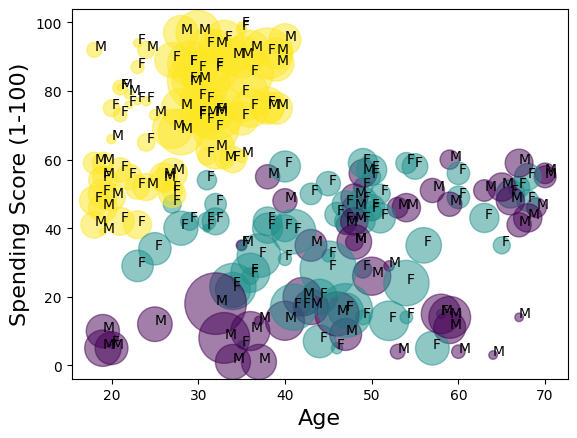

In [85]:
area = np.pi * (df["Annual Income (k$)"])**2/30
#x[:,1]
#fig, ax = plt.subplots()

plt.scatter(df["Age"], df["Spending Score (1-100)"],  s=area, c=labels.astype(float), alpha=0.5)

plt.xlabel('Age', fontsize=16)
plt.ylabel('Spending Score (1-100)', fontsize=16)

c=0
for i in list((df["Gender"].values)):
    s="M" if i==1 else "F"
    plt.text(float(df["Age"].values[c]), float(df["Spending Score (1-100)"].values[c]),s)
    c+=1
plt.show()

###  شرح دسته بندی ها
* **yellow cluster:** Less than 40 years old with high spending score
* **Cyan Cluster:** Other Females (Usually have medium spending Score)
* **Purple Cluster:** Other Males (Lower Spending Score)

## Hierarchical

In [166]:
from sklearn.cluster import AgglomerativeClustering 

In [167]:
from sklearn.metrics.pairwise import euclidean_distances
dist_matrix = euclidean_distances(x,x) 
print(dist_matrix)

[[0.         1.63681098 2.38878538 ... 4.54611614 4.81867651 5.02250496]
 [1.63681098 0.         3.54154808 ... 4.3182849  5.31878915 4.70189264]
 [2.38878538 3.54154808 0.         ... 5.42195122 5.13299938 5.90251765]
 ...
 [4.54611614 4.3182849  5.42195122 ... 0.         2.21418015 0.5647686 ]
 [4.81867651 5.31878915 5.13299938 ... 2.21418015 0.         2.5274803 ]
 [5.02250496 4.70189264 5.90251765 ... 0.5647686  2.5274803  0.        ]]


In [168]:
Z = scipy.cluster.hierarchy.linkage(dist_matrix, 'complete')

C:\Users\nateg\AppData\Local\Temp\ipykernel_6620\2054438234.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = scipy.cluster.hierarchy.linkage(dist_matrix, 'complete')


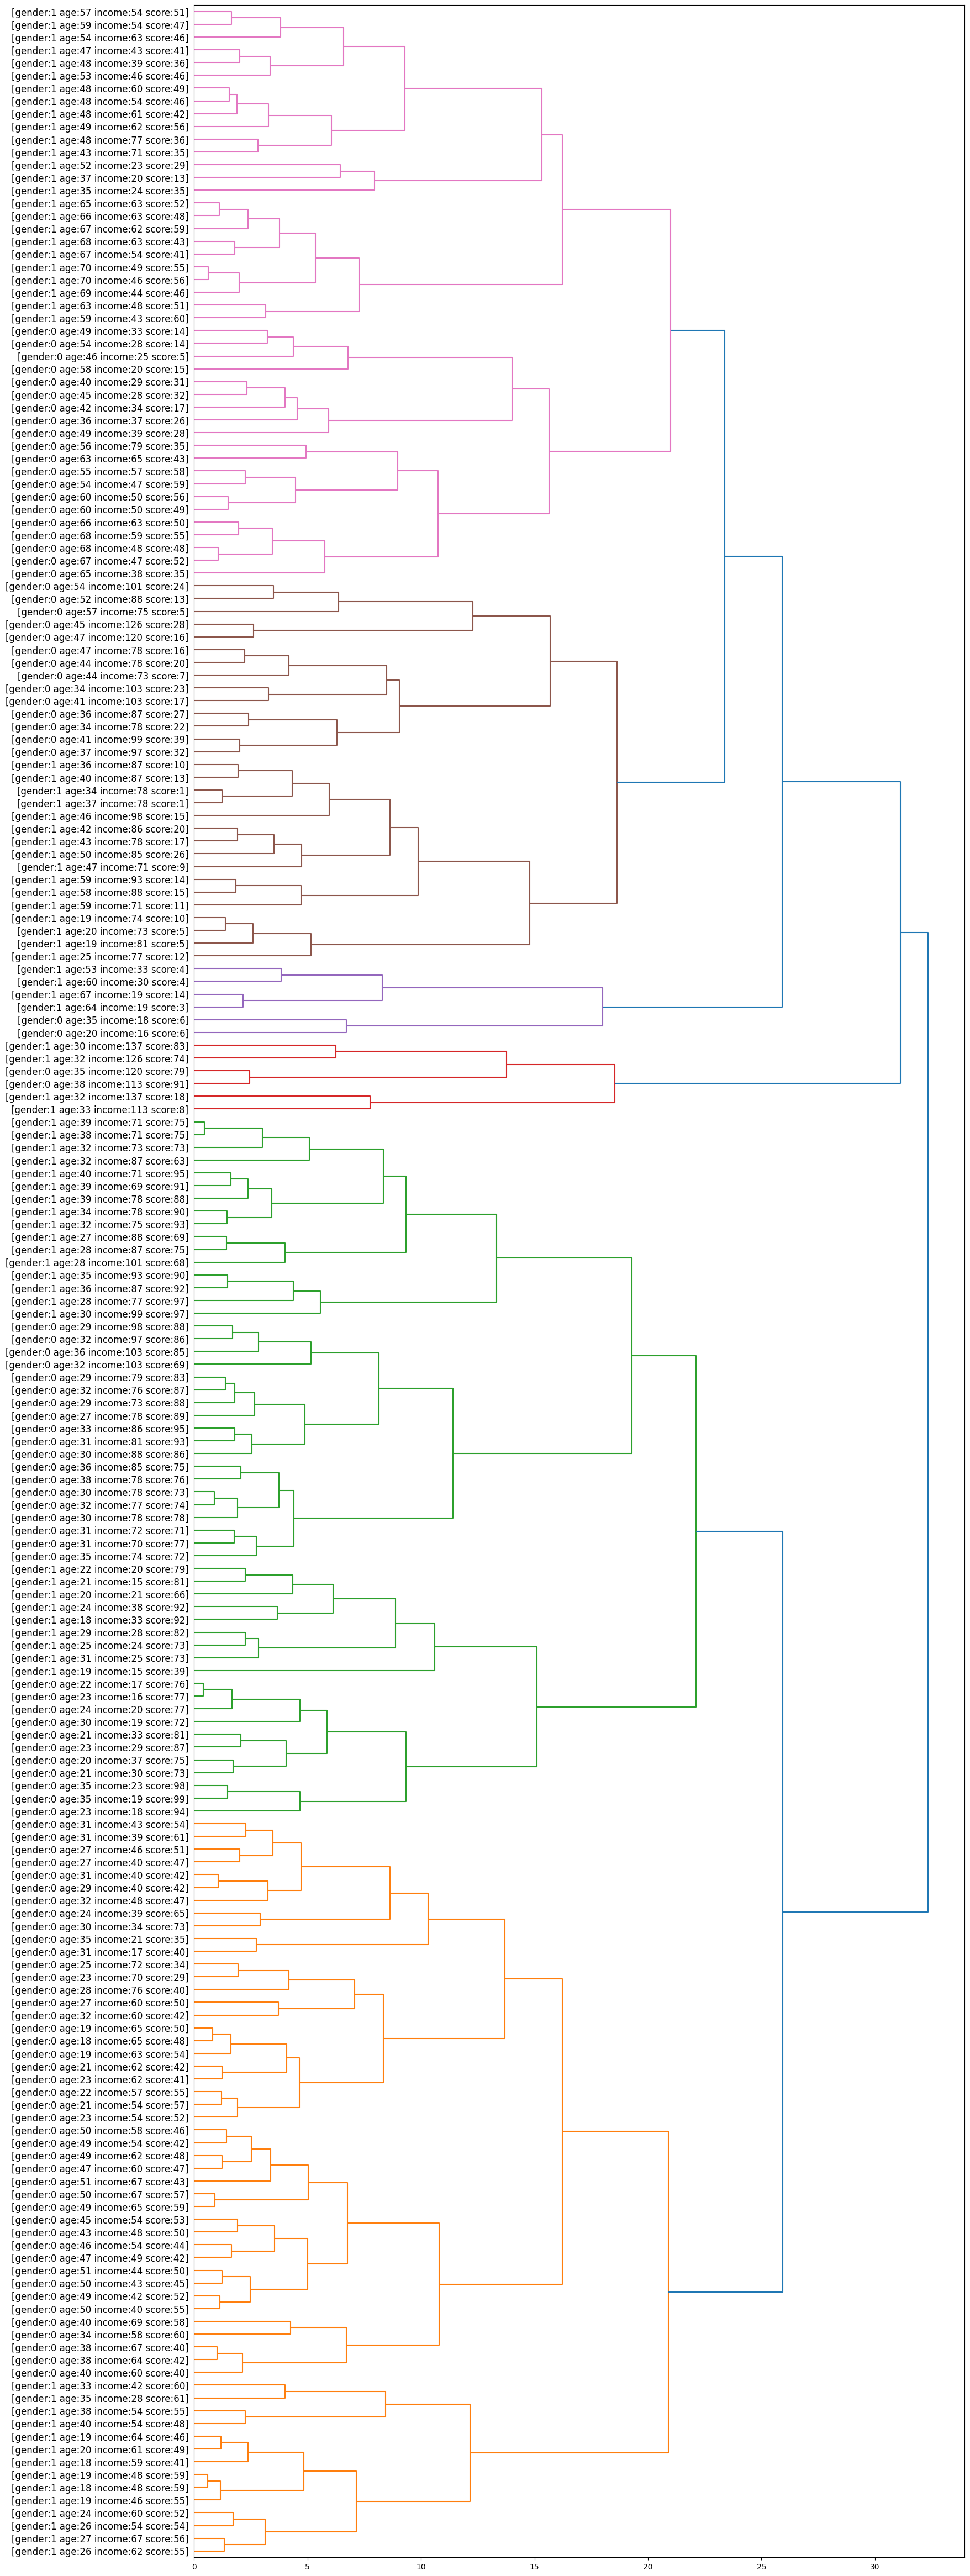

In [169]:
import pylab
fig = pylab.figure(figsize=(18,60))
#Gender	Age	Annual Income (k$)	Spending Score (1-100)	Clus_km
def llf(id):
    return '[gender:%s age:%s income:%s score:%s]' % (df['Gender'].values[id],df['Age'].values[id],df['Annual Income (k$)'].values[id],df['Spending Score (1-100)'].values[id])
#((df['Gender'][id]), (df['Age'][id]), (df['Annual Income (k$)'][id]),(df['Spending Score (1-100)'][id]),(df['Clus_km'][id]))
    
dendro = scipy.cluster.hierarchy.dendrogram(Z, leaf_label_func=llf,  leaf_rotation=0, leaf_font_size =12, orientation = 'right')

In [234]:
agglom = AgglomerativeClustering(n_clusters = 3, linkage = 'ward')
agglom.fit(dist_matrix)

agglom.labels_

C:\Program Files\Python38\lib\site-packages\scipy\cluster\hierarchy.py:834: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


array([0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 2,
       2, 0, 2, 2, 2, 2, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 1, 0, 2, 2, 1, 0,
       2, 2, 0, 2, 1, 2, 2, 2, 1, 0, 2, 0, 2, 2, 1, 0, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 0, 1, 2, 2, 0, 2, 2, 1, 0, 2, 2, 1, 0, 1, 2, 2, 1, 1, 1,
       1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 1, 0, 1, 0, 1, 0,
       2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 2, 0,
       2, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 2, 0,
       1, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 1, 0, 1, 1,
       1, 1], dtype=int64)

In [235]:
df['clus_h'] = agglom.labels_
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km,clus_h
CustomerID,,,,,,
1,1,19,15,39,2,0
2,1,21,15,81,2,0
3,0,20,16,6,1,2
4,0,23,16,77,2,0
5,0,31,17,40,1,2


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


Text(0, 0.5, 'Spending Score (1-100)')

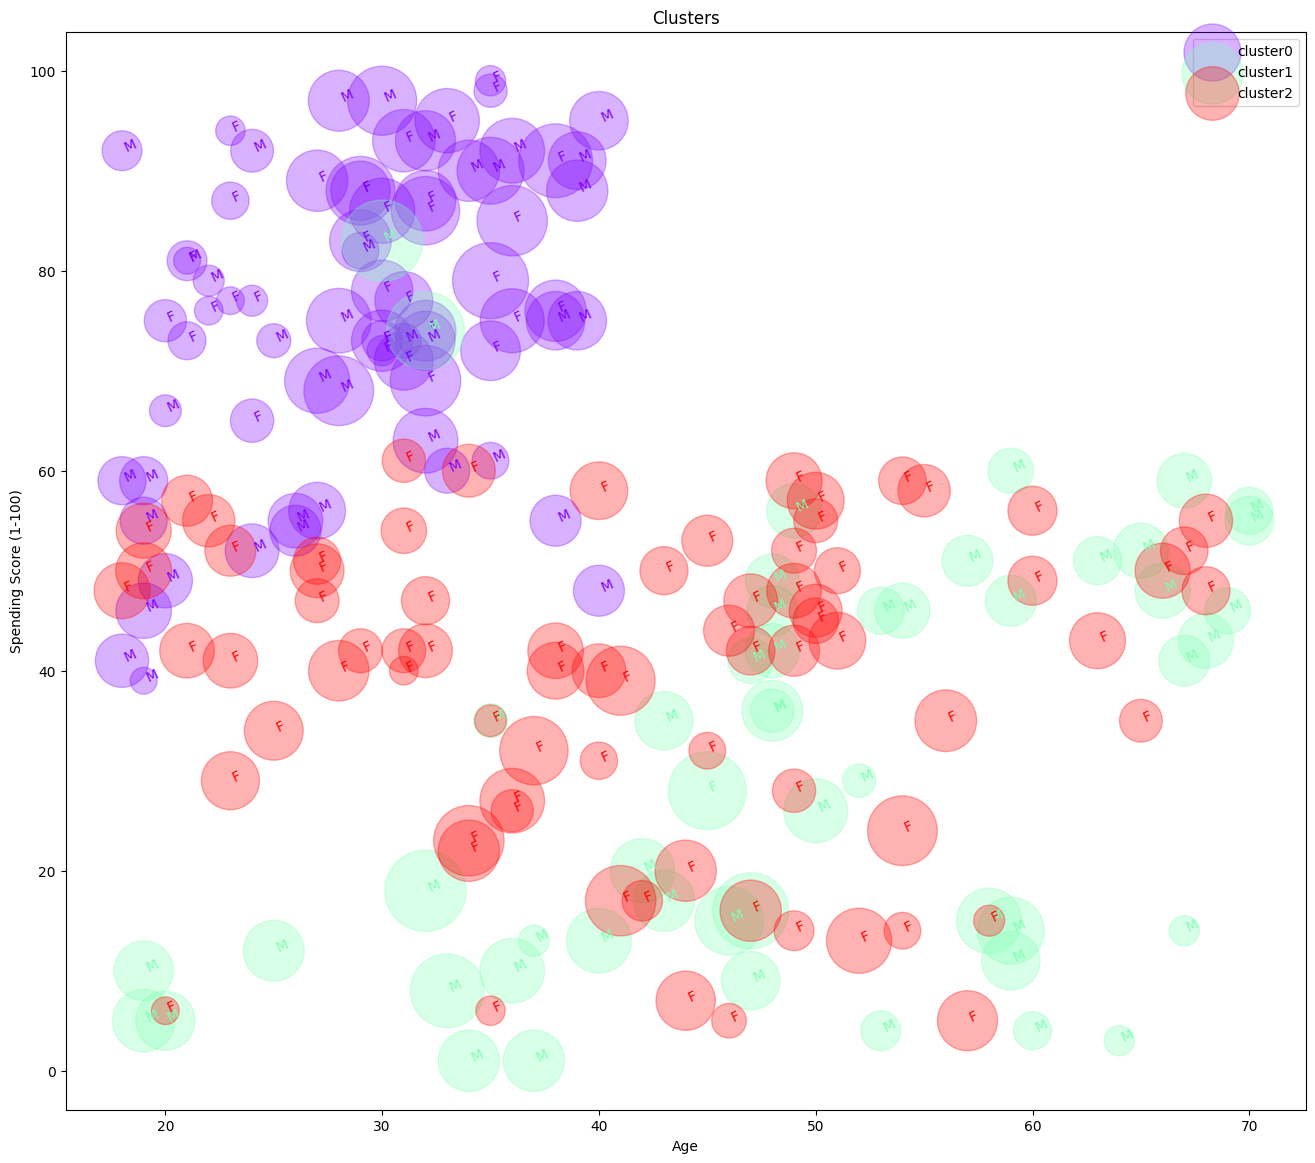

In [236]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = df[df.clus_h == label]
    for i in subset.index:
            txt="M" if subset.Gender[i]==1 else "F"
            plt.text(subset.Age[i], subset["Spending Score (1-100)"][i], txt, rotation=25,c=color) 
    plt.scatter(subset.Age, subset["Spending Score (1-100)"], s= subset["Annual Income (k$)"]*25, c=color, label='cluster'+str(label),alpha=0.3)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

###  شرح دسته بندی ها
* **cluster0:** Less than 40 years old with high spending score
* **Cluster1:** Other Males (Lower Spending Score)
* **Cluster2:** Other Females (Usually have medium spending Score)

## DBSCAN

In [347]:
from sklearn.cluster import DBSCAN 

In [348]:
# Compute DBSCAN
db = DBSCAN(eps=.8, min_samples=5).fit(x)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
df["Clus_DBSCAN"]=labels

realClusterNum=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum = len(set(labels)) 


# A sample of clusters
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km,clus_h,Clus_DBSCAN
CustomerID,,,,,,,
1,1,19,15,39,2,0,-1
2,1,21,15,81,2,0,0
3,0,20,16,6,1,2,-1
4,0,23,16,77,2,0,1
5,0,31,17,40,1,2,1


In [349]:
set(labels)

{-1, 0, 1, 2, 3, 4}

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'Spending Score (1-100)')

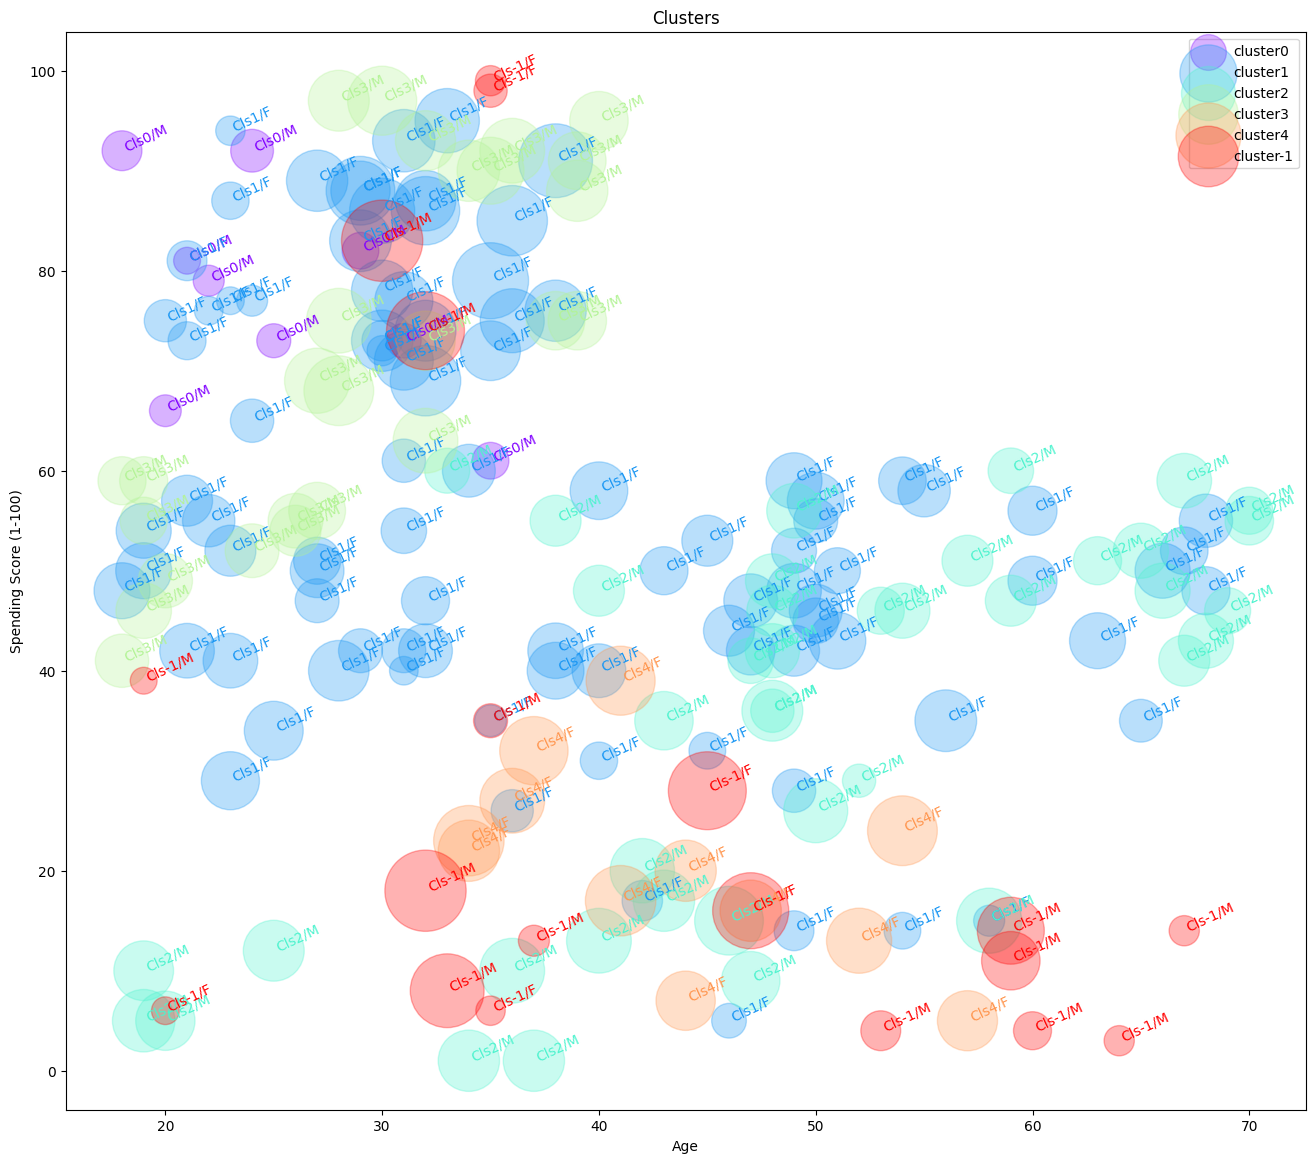

In [350]:
import matplotlib.cm as cm
n_clusters = len(set(labels))
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
#cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, set(labels)):
    subsetdb = df[df.Clus_DBSCAN == label]
    for i in subsetdb.index:
            txt="M" if subsetdb.Gender[i]==1 else "F"
            plt.text(subsetdb.Age[i], subsetdb["Spending Score (1-100)"][i], str("Cls"+str(label)+"/"+txt), rotation=25,c=color) 
    plt.scatter(subsetdb.Age, subsetdb["Spending Score (1-100)"], s= subsetdb["Annual Income (k$)"]*25, c=color, label='cluster'+str(label),alpha=0.3)

plt.legend()
plt.title('Clusters')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

###  شرح دسته بندی ها
* **cluster-1:** Outliers

* **Cluster0:** Male with high Spending Score (lower income)
* **Cluster3** Male with high Spending Score (higher income)
* **Cluster2** Male with low spending Score

* **Cluster1:** Normal Females
* **Cluster4** High Income Female with low Spending Score

با توجه به اینکه درآمد و امتیاز در این دسته بندی به نظر مهم هستند نمودار را روی این دو محور رسم می کنیم

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'Spending Score (1-100)')

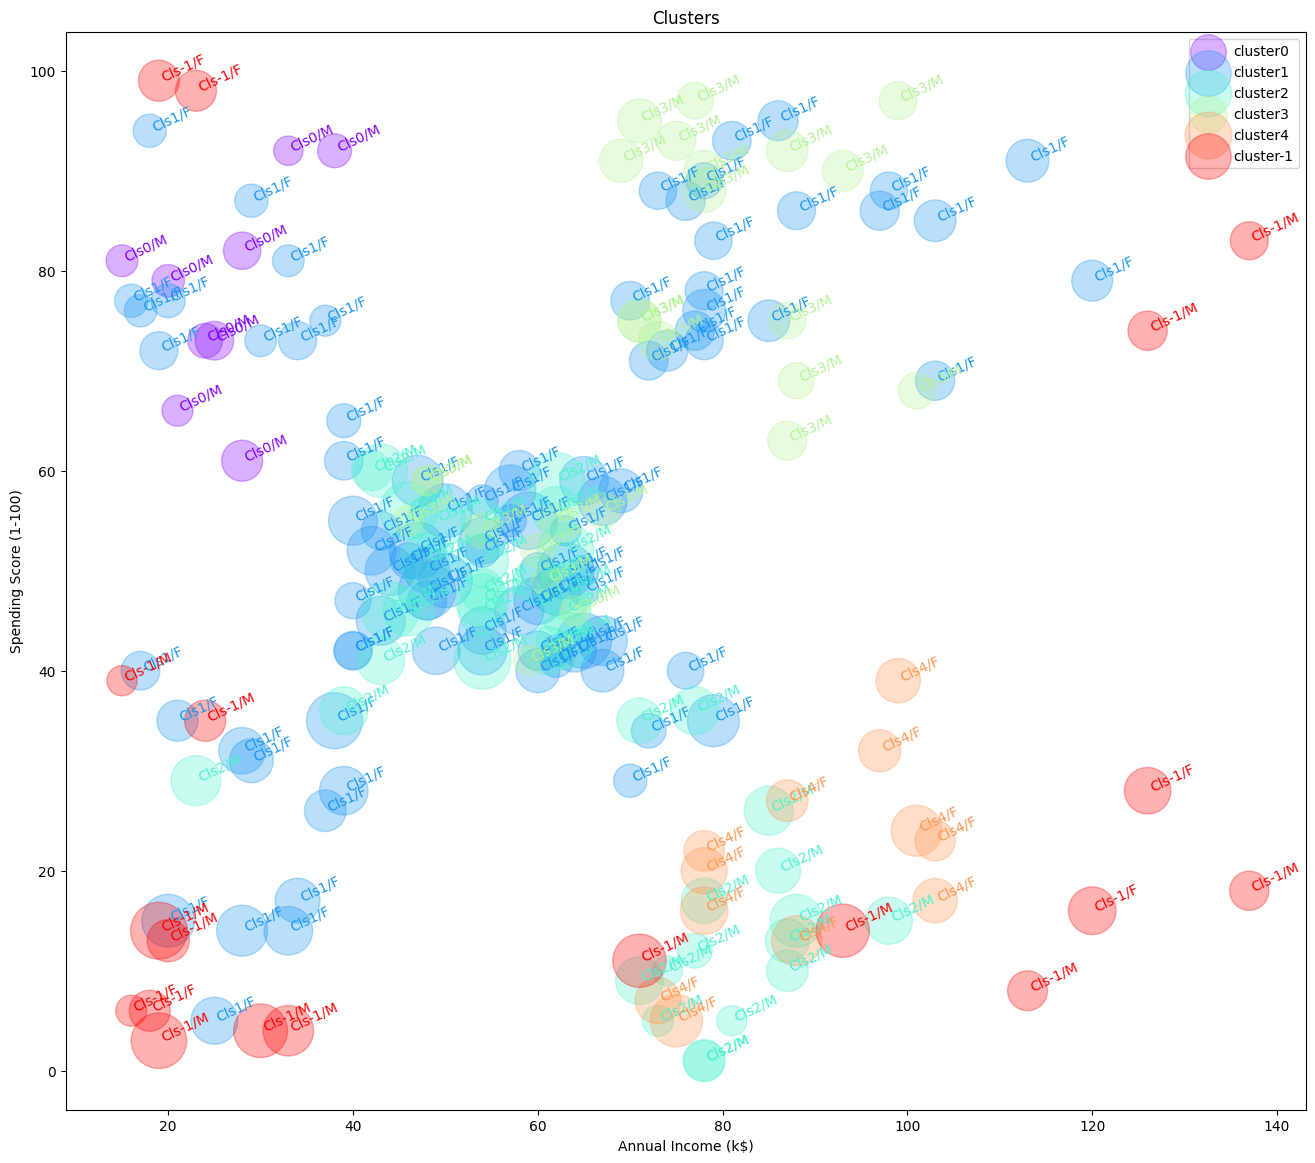

In [351]:
import matplotlib.cm as cm
n_clusters = len(set(labels))
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
#cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, set(labels)):
    subsetdb = df[df.Clus_DBSCAN == label]
    for i in subsetdb.index:
            txt="M" if subsetdb.Gender[i]==1 else "F"
            plt.text(subsetdb["Annual Income (k$)"][i], subsetdb["Spending Score (1-100)"][i], str("Cls"+str(label)+"/"+txt), rotation=25,c=color) 
    plt.scatter(subsetdb["Annual Income (k$)"], subsetdb["Spending Score (1-100)"], s= subsetdb.Age*25, c=color, label='cluster'+str(label),alpha=0.3)

plt.legend()
plt.title('Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

### Again DBSCAN without Age column

In [377]:
x2=np.delete(x,1,1)

In [459]:
# Compute DBSCAN
db2 = DBSCAN(eps=.55, min_samples=4).fit(x2)
core_samples_mask2 = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask2[db.core_sample_indices_] = True
labels2 = db2.labels_
df["Clus_DBSCAN2"]=labels2

realClusterNum2=len(set(labels)) - (1 if -1 in labels else 0)
clusterNum2 = len(set(labels)) 


# A sample of clusters
df.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clus_km,clus_h,Clus_DBSCAN,Clus_DBSCAN2
CustomerID,,,,,,,,
1,1,19,15,39,2,0,-1,-1
2,1,21,15,81,2,0,0,0
3,0,20,16,6,1,2,-1,1
4,0,23,16,77,2,0,1,1
5,0,31,17,40,1,2,1,1


In [460]:
set(labels2)

{-1, 0, 1, 2, 3, 4, 5}

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or R

Text(0, 0.5, 'Spending Score (1-100)')

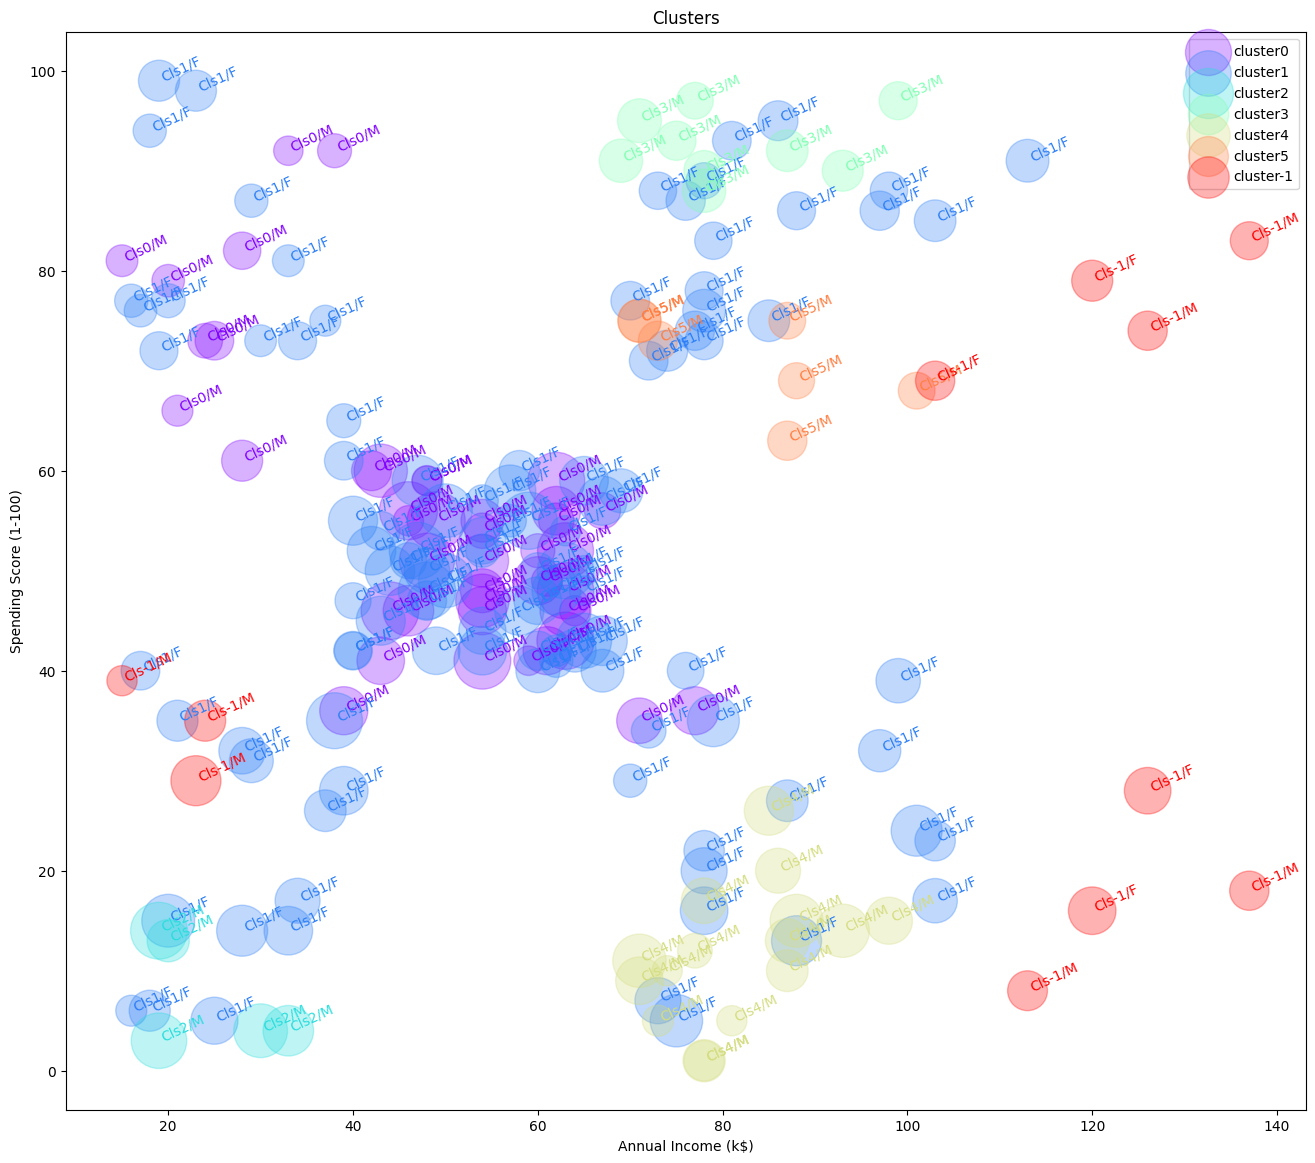

In [461]:
import matplotlib.cm as cm
n_clusters = len(set(labels2))
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
#cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, set(labels2)):
    subsetdb = df[df.Clus_DBSCAN2 == label]
    for i in subsetdb.index:
            txt="M" if subsetdb.Gender[i]==1 else "F"
            plt.text(subsetdb["Annual Income (k$)"][i], subsetdb["Spending Score (1-100)"][i], str("Cls"+str(label)+"/"+txt), rotation=25,c=color) 
    plt.scatter(subsetdb["Annual Income (k$)"], subsetdb["Spending Score (1-100)"], s= subsetdb.Age*25, c=color, label='cluster'+str(label),alpha=0.3)

plt.legend()
plt.title('Clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')

###  شرح دسته بندی ها
* **cluster-1:** Outliers

* **Cluster0:** Male - mid to high Spending Score -  mid to low income
* **Cluster2** Male - low Spending Score- low income
* **Cluster3** Male - high spending Score - high income
* **Cluster4** Male - low spending Score - high income
* **Cluster4** Male - mid spending Score - high income
* **Cluster1:** Females - Normal


## جمع بندی
**K-Means** Result was better seeking for a simple 3 cluster clustering

**Hierarchical** output with the defined setting is close to K-Means

**DBSCAN** : with the setting we divided the Male Sample to more Clusters

Depend on the domain expert seggestion we can use any of the applied methods